#### 许多重要金融模型，如均值-方差投资组合理论和资本性资产定价模型（CAPM），都依赖于证券收益呈正态分布这一假设,实际的金融市场数据大多数都不是正态的。大多数情况下数据和假设是有出入的

* 价格数据的正态性检验

* 收益率数据的正态性检验

QQ图（quantile-quantile plot）在金融风险管理中的主要作用是检验两个数据是否服从同一分布，通过画出两组数据的累计分布函数，比较在同一百分比面积α下对应的x、y轴分位数是否相同（即QQ图所有点基本上在45°线上）来实现

很多时候需要检验股票价格数据是否服从对数正态分布，或者收益率是否服从正态分布。

画出它的累积分布函数图，以及与正态分布比较的QQ图来验证其正态性。


In [6]:
# 概率密度图、qq图 可视化判断正态性
import tushare as ts
import pandas as pd
import numpy as np
import scipy.stats as scs  # scipy 是一个科学计算的模块，优化算法、统计。。。字模块，要先安装
from pylab import plt,mpl
%matplotlib inline

In [7]:
# 设置图片的中文显示
mpl.rcParams['font.sans-serif'] ='SimHei'    #显示中文
mpl.rcParams['axes.unicode_minus'] = False    #显示负号

In [8]:
def  pdf_plot(data):
    """ 用户画概率密度图 的函数"""
    plt.figure(figsize=(10,6))    # 画布
    plt.hist(data,bins=50,label='样本观测值的频率')  # 数据直方图    bins: 直方图的柱数，即要分的组数，默认为10；
    plt.xlabel('样本值')   # 坐标轴标签
    plt.ylabel('样本频率')
    x = np.linspace(plt.axis()[0],plt.axis()[1],100)  # 等差数列，x轴的值
    plt.plot(x,scs.norm.pdf(x,data.mean(),data.std()),'r',label='概率密度函数')

In [9]:
import statsmodels.api as sm   # statsmodels库需要额外安装  即Q--Q'图，与y = x线进行比较，若基本吻合则原序列服从正态分布，若相差较大则不服从正态分布。
def qq_plot(data):
    
    sm.qqplot(data,line='s')
    plt.grid(True)
    plt.xlabel('理论分位数')
    plt.ylabel('样本实际的分位数')

In [10]:
app0=pd.read_excel('000027.xls')
app0['日期']=pd.to_datetime(app0['日期'])
#app0['日期', '开盘价','最高价','最低价','收盘价','涨跌额','涨跌幅(%)','成交量(手)','成交金额(万元)','振幅','换手率']
appl=pd.DataFrame(data=app0,columns=['日期', '开盘价','最高价','最低价','收盘价','涨跌额','涨跌幅(%)','成交量(手)','成交金额(万元)','振幅','换手率'])
#appl.set_index(keys='日期')
appl =appl.set_index('日期').sort_index()
appl

,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅,换手率
日期,,,,,,,,,,
2020-01-02,6.26,6.28,6.22,6.23,0.02,0.32,"91,728","5,731",0.97,0.23
2020-01-03,6.24,6.26,6.20,6.26,0.03,0.48,"79,114","4,931",0.96,0.20
2020-01-06,6.24,6.28,6.21,6.24,-0.02,-0.32,"111,752","6,981",1.12,0.28
2020-01-07,6.24,6.35,6.22,6.31,0.07,1.12,"130,867","8,237",2.08,0.33
2020-01-08,6.29,6.29,6.11,6.14,-0.17,-2.69,"150,504","9,321",2.85,0.38
...,...,...,...,...,...,...,...,...,...,...
2021-06-11,10.16,10.94,10.16,10.66,0.51,5.02,"1,425,118","151,768",7.68,3.00
2021-06-15,10.66,10.78,10.30,10.44,-0.22,-2.06,"918,688","96,353",4.50,1.93
2021-06-16,10.30,10.31,9.53,9.70,-0.74,-7.09,"1,130,270","111,025",7.47,2.38


In [20]:
appl['logreturn'] = np.log(appl['收盘价']/appl['收盘价'].shift(1))
appl['return'] = (appl['收盘价']-appl['收盘价'].shift(1))/appl['收盘价'].shift(1)
appl

,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅,换手率,logreturn,return
日期,,,,,,,,,,,,
2020-01-02,6.26,6.28,6.22,6.23,0.02,0.32,"91,728","5,731",0.97,0.23,NaN,NaN
2020-01-03,6.24,6.26,6.20,6.26,0.03,0.48,"79,114","4,931",0.96,0.20,0.004804,0.004815
2020-01-06,6.24,6.28,6.21,6.24,-0.02,-0.32,"111,752","6,981",1.12,0.28,-0.003200,-0.003195
2020-01-07,6.24,6.35,6.22,6.31,0.07,1.12,"130,867","8,237",2.08,0.33,0.011155,0.011218
2020-01-08,6.29,6.29,6.11,6.14,-0.17,-2.69,"150,504","9,321",2.85,0.38,-0.027311,-0.026941
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,10.16,10.94,10.16,10.66,0.51,5.02,"1,425,118","151,768",7.68,3.00,0.049025,0.050246
2021-06-15,10.66,10.78,10.30,10.44,-0.22,-2.06,"918,688","96,353",4.50,1.93,-0.020854,-0.020638
2021-06-16,10.30,10.31,9.53,9.70,-0.74,-7.09,"1,130,270","111,025",7.47,2.38,-0.073519,-0.070881


In [42]:
appl=appl.dropna(axis=0,subset =["logreturn","return"]) 
appl

,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(手),成交金额(万元),振幅,换手率,logreturn,return
日期,,,,,,,,,,,,
2020-01-03,6.24,6.26,6.20,6.26,0.03,0.48,"79,114","4,931",0.96,0.20,0.004804,0.004815
2020-01-06,6.24,6.28,6.21,6.24,-0.02,-0.32,"111,752","6,981",1.12,0.28,-0.003200,-0.003195
2020-01-07,6.24,6.35,6.22,6.31,0.07,1.12,"130,867","8,237",2.08,0.33,0.011155,0.011218
2020-01-08,6.29,6.29,6.11,6.14,-0.17,-2.69,"150,504","9,321",2.85,0.38,-0.027311,-0.026941
2020-01-09,6.16,6.25,6.16,6.19,0.05,0.81,"76,713","4,745",1.47,0.19,0.008110,0.008143
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,10.16,10.94,10.16,10.66,0.51,5.02,"1,425,118","151,768",7.68,3.00,0.049025,0.050246
2021-06-15,10.66,10.78,10.30,10.44,-0.22,-2.06,"918,688","96,353",4.50,1.93,-0.020854,-0.020638
2021-06-16,10.30,10.31,9.53,9.70,-0.74,-7.09,"1,130,270","111,025",7.47,2.38,-0.073519,-0.070881


In [11]:
pro = ts.pro_api('eb13b3bfd2bd07fd9eb40234f19941c73f230e1e98cc212b8cd407c7')

In [12]:
data =pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20200718')

In [13]:
data = data.set_index('trade_date').sort_index()

In [14]:
data.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20180702,000001.SZ,9.05,9.05,8.55,8.61,9.09,-0.48,-5.28,1315520.13,1158545.868
20180703,000001.SZ,8.69,8.70,8.45,8.67,8.61,0.06,0.70,1274838.57,1096657.033
20180704,000001.SZ,8.63,8.75,8.61,8.61,8.67,-0.06,-0.69,711153.37,617278.559
20180705,000001.SZ,8.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579
20180706,000001.SZ,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526


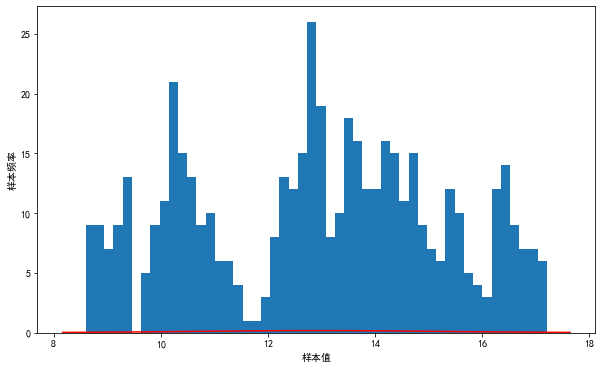

In [15]:
pdf_plot(data['close'])  # 价格数据的分布

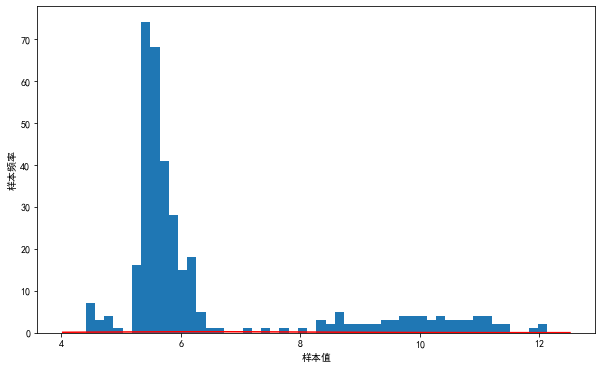

In [16]:
pdf_plot(appl['收盘价'])  # 价格数据的分布

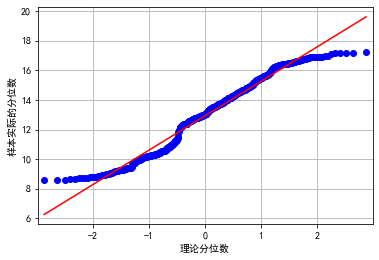

In [23]:
qq_plot(data['close'])  # 价格数据的qq图

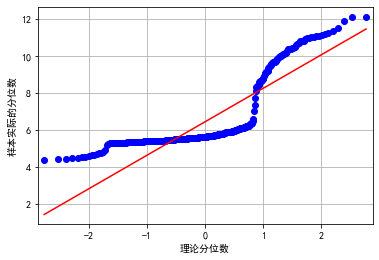

In [24]:
qq_plot(appl['收盘价'])  # 价格数据的qq图

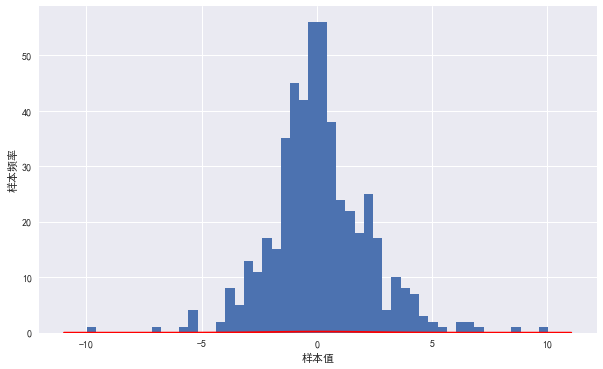

In [23]:
pdf_plot(data['pct_chg'])

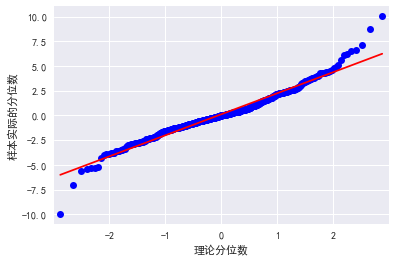

In [18]:
qq_plot(data['pct_chg'])

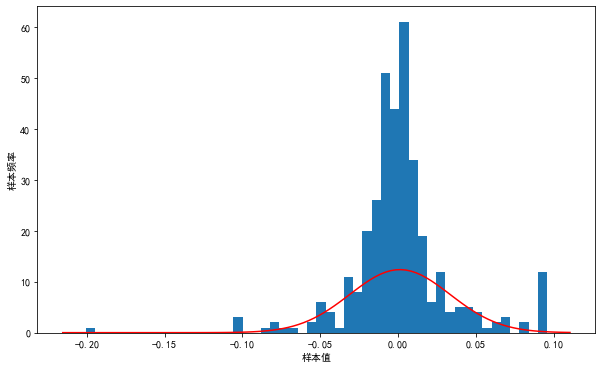

In [25]:
pdf_plot(appl['logreturn'])

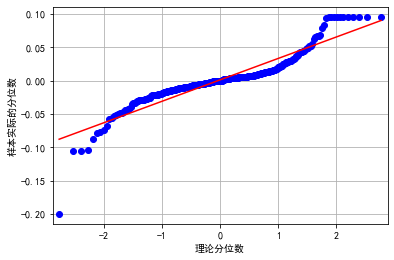

In [37]:
qq_plot(appl['logreturn'])

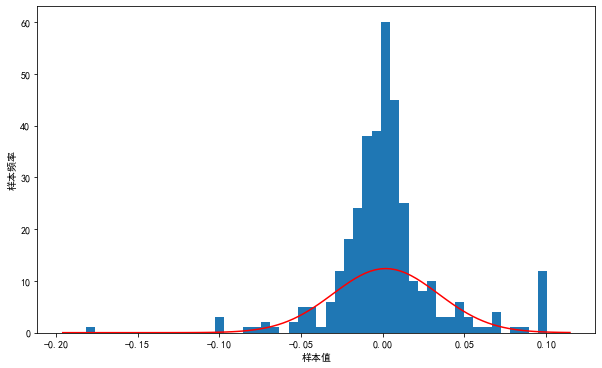

In [38]:
pdf_plot(appl['return'])

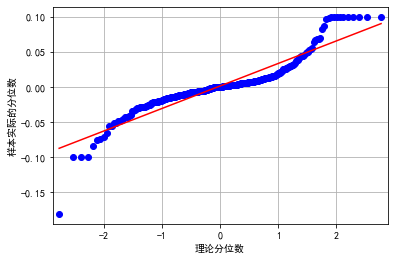

In [39]:
qq_plot(appl['return'])

In [30]:
#  价格数据从图片完全不存在正态性，收益率数据相对好一些，但是也存在大尾巴
#  进一步进行正态性的检验
def normality_test(data):
    """ 根据偏度 峰度 正态性检验的P值等查看数据的正态性"""
    print('偏斜度：',scs.skew(data))
    print('偏斜度测试的P值：',scs.skewtest(data)[1])
    print('峰度：',scs.kurtosis(data))
    print('峰度测试的P值：',scs.kurtosistest(data)[1])
    print('正态性检验的P值：',scs.normaltest(data)[1])

In [31]:
normality_test(data['pct_chg'])

偏斜度： 0.30683587481260305
偏斜度测试的P值： 0.005506459211850274
峰度： 2.5755923009134767
峰度测试的P值： 3.943238911627592e-09
正态性检验的P值： 6.344050468673175e-10


In [40]:
normality_test(appl['logreturn'])

偏斜度： -0.22524201274046948
偏斜度测试的P值： 0.08187488321859329
峰度： 6.308683704005146
峰度测试的P值： 1.1074135261355631e-13
正态性检验的P值： 2.3087914054438097e-13


In [41]:
normality_test(appl['return'])

偏斜度： 0.15013530749681933
偏斜度测试的P值： 0.24314461308598312
峰度： 5.201480724360643
峰度测试的P值： 4.441074925004192e-12
正态性检验的P值： 1.98894811603307e-11


###  综合练习
* 提取国内市场指数（上证指数，沪深300等指数数据）检验其是否有正态性
* 提取国际市场数据（sp500,MSFT,INTC等数据)检验期是否有正态性